# Classification Examples

In [1]:
# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from slickml.classification import XGBoostCVClassifier

# XGBoostCVClassifier

## Example 1

In [3]:
# loading data
df = pd.read_csv("../data/dummy_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [4]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [47]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostCVClassifier(num_boost_round=500,
                          n_splits=4,
                          metrics=("logloss"),
                          params=params)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 191 -*- 4-Folds CV LOGLOSS: Train = 0.232 +/- 0.008 -*- Test = 0.32 +/- 0.02 *-*


In [48]:
# predic proba (or clf.predict_proba_)
pred_proba = clf.predict_proba(X_test, y_test)
pred_proba[:10]

array([0.6872404 , 0.6437372 , 0.9898107 , 0.91745585, 0.8029401 ,
       0.79498386, 0.6696425 , 0.9213432 , 0.9763105 , 0.9957327 ],
      dtype=float32)

In [49]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.head()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.675742,0.001048,0.676923,0.000887
1,0.658359,0.001082,0.660327,0.001060
2,0.641805,0.001733,0.644856,0.001562
3,0.626294,0.002659,0.630706,0.002399
4,0.610746,0.002758,0.615883,0.002467


In [50]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1145.921151
1,F6,622.148287
2,F5,570.030153
3,F2,479.170822
4,F4,88.880518
5,F3,86.359118


###  TODO

In [51]:
def plot_xgb_cv_results(figsize=None,
                        linestyle=None,
                        label_train=None,
                        label_test=None,
                        color_train=None,
                        color_std_train=None,
                        color_test=None,
                        colort_std_test=None
                       
                       
                       ):
    """
    Function to plot cv results of XGBoostCVClassifier.
    
    """
    pass

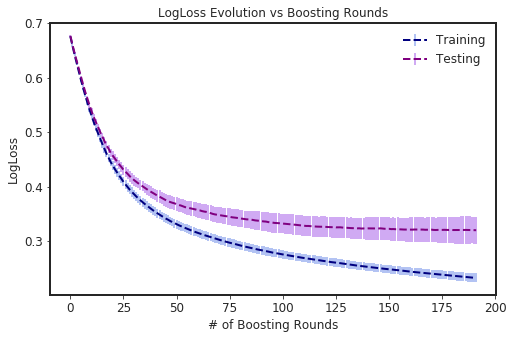

In [56]:
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set_style("ticks")
mpl.rcParams["axes.linewidth"] = 2
mpl.rcParams["lines.linewidth"] = 2
display(HTML("<style>.container { width:95% !important; }</style>"))

cv_results = clf.cv_results_
metric = cv_results.columns.tolist()[0].split("-")[1]
metrics= ["AUC", "AUCPR", "Error", "LogLoss"]
for m in metrics:
    if m.lower() == metric:
        metric = m

plt.figure(figsize=(8,5))
plt.errorbar(range(cv_results.shape[0]), cv_results.iloc[:,0],
            yerr = cv_results.iloc[:,1], fmt = "--", ecolor="#B3C3F3",c = "navy", label = "Training")

plt.errorbar(range(cv_results.shape[0]), cv_results.iloc[:,2],
            yerr = cv_results.iloc[:,3], fmt = "--", ecolor="#D0AAF3", c = "purple", label = "Testing")


plt.xlabel("# of Boosting Rounds" ,  fontsize=12)
plt.ylabel(F"""{metric}""", fontsize=12)
plt.title(F"""{metric} Evolution vs Boosting Rounds""" , fontsize=12) 
plt.tick_params(axis="both", which="major", labelsize = 12)
plt.legend(loc = 0, prop={"size": 12}, framealpha=0.0)
plt.show()

In [55]:
metric

'logloss'

In [74]:
import shap

In [189]:
clf.get_feature_importance()

,feature,total_gain
0,F1,1161.246964
1,F6,629.780284
2,F5,574.902815
3,F2,487.147613
4,F4,92.935422
5,F3,87.503146


In [190]:
clf.get_xgb_params()

{'eval_metric': 'auc',
 'tree_method': 'hist',
 'objective': 'binary:logistic',
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'gamma': 0.0,
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'subsample': 0.9,
 'max_delta_step': 1,
 'silent': True,
 'nthread': 4,
 'scale_pos_weight': 1,
 'validate_parameters': 1}

In [191]:
clf.n_splits

4

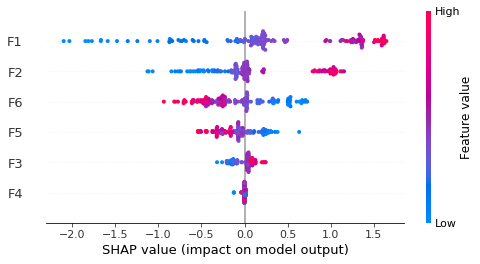

In [197]:
exp = shap.TreeExplainer(bst)
exp_vals = exp.shap_values(X_test)
shap.summary_plot(exp_vals, X_test)